<a href="https://colab.research.google.com/github/park-geun-hyeong/Kaggle_project/blob/main/facial_keypoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path="/content/drive/MyDrive/Kaggle/kaggle_facial_keypoint/"

train=pd.read_csv(path+'training.csv')
test=pd.read_csv(path+'test.csv')
submission=pd.read_csv(path+'SampleSubmission.csv')
table=pd.read_csv(path+'IdLookupTable.csv')

In [3]:
train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [5]:
submission

,RowId,Location
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27119,27120,0
27120,27121,0
27121,27122,0
27122,27123,0


In [6]:
table.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [7]:
print("train.shape: {}".format(train.shape))
print("test.shape: {}".format(test.shape))
print("submission.shape: {}".format(submission.shape))
print("table.shape: {}".format(table.shape))


train.shape: (7049, 31)
test.shape: (1783, 2)
submission.shape: (27124, 2)
table.shape: (27124, 4)


In [8]:
train.transpose().head(31) #총 15개 facial idex들의 x,y위치가 있다.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7009,7010,7011,7012,7013,7014,7015,7016,7017,7018,7019,7020,7021,7022,7023,7024,7025,7026,7027,7028,7029,7030,7031,7032,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042,7043,7044,7045,7046,7047,7048
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253,69.6807,64.1319,67.4689,65.8029,64.1212,65.2302,66.7376,66.5747,65.2706,66.6072,68.4913,66.6769,66.8504,67.8395,69.2335,65.5956,64.7625,66.0827,64.7186,66.3343,64.553,65.3184,65.4594,65.3769,72.3532,64.1556,64.9563,69.4418,67.5089,65.3781,66.0595,64.7125,66.215,67.0397,64.3325,...,66.6593,65.2627,66.3166,67.9037,66.4645,66.301,67.1193,64.8367,65.3903,62.3849,65.6084,61.9972,64.9061,67.0451,60.2021,72.2262,67.7241,63.0133,67.2779,65.84,69.4632,64.3929,67.3677,68.3209,66.162,66.6519,70.5049,71.2582,69.6162,64.6155,69.2299,63.353,65.7112,67.9293,66.8672,67.4025,66.1344,66.6907,70.9651,66.9383
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213,39.9687,34.29,39.4135,34.7552,36.7403,34.3426,39.8864,37.308,34.9402,38.9381,35.9002,33.9412,35.637,38.5979,40.0215,36.6264,34.9334,37.1537,35.8612,33.7213,36.5242,35.2704,38.9086,38.1289,34.4171,35.2538,35.2355,37.8516,35.7277,35.632,36.8486,34.2681,35.6378,32.372,34.6073,...,40.0731,36.2124,43.8757,41.7278,37.9797,35.7512,37.9044,35.2976,32.2801,32.2983,37.6214,37.2758,41.8102,41.7374,37.7435,40.0464,38.876,36.0536,37.3832,39.1238,41.0387,38.2252,38.0488,36.8326,35.9309,37.3327,35.7834,39.7446,38.0495,35.1653,38.5756,35.6713,38.8435,35.8466,37.3569,31.8426,38.3655,36.8452,39.8537,43.4245
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448,29.1836,29.579,29.356,27.4758,29.4689,28.8027,30.2704,30.4453,33.0227,28.5962,27.8312,30.7136,32.5281,28.0167,25.5508,31.5408,31.8597,27.9783,31.5907,29.0771,32.2198,30.3096,32.0514,29.2155,28.6554,30.7579,29.1167,28.6935,30.6683,30.191,26.5891,30.8571,30.4626,27.1397,32.8899,...,31.0751,29.3557,28.1583,34.0728,30.0619,30.8998,33.7967,31.2624,28.2914,32.7659,31.2643,31.4254,30.5803,29.8587,38.6491,33.0462,29.3992,28.7469,29.1766,29.494,33.8927,29.21,28.6823,29.1977,33.1005,29.2966,32.1823,33.4652,29.494,26.7072,29.4079,33.9521,32.2688,28.6878,30.7509,29.7467,30.4786,31.6664,30.5433,31.0961
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042,37.5634,33.138,39.6217,36.1856,38.3902,33.9378,38.8144,37.308,32.9769,36.3032,37.0221,36.1495,36.5246,36.3977,38.0719,39.3078,37.1915,37.436,39.1194,34.0977,38.0786,38.7026,39.2602,39.5589,32.828,35.2538,35.2355,35.6967,33.6292,34.3974,37.7069,32.2253,37.5031,32.372,37.2519,...,35.5442,42.2983,37.3487,38.4538,39.0829,36.8461,38.2101,40.0939,36.1694,40.8549,38.459,37.9127,36.566,38.177,37.4441,37.8698,37.9297,38.0497,40.6963,42.3241,41.8064,38.6517,37.8144,37.5662,34.9929,37.8341,39.0827,36.6878,42.5967,39.8279,38.3455,40.8164,37.706,41.4525,40.1157,38.6329,39.9502,39.685,40.7723,39.5286
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659,62.8643,57.7972,59.555,58.6522,58.6209,58.7538,61.0176,59.0362,60.5032,61.7145,62.3222,60.3671,61.2288,60.1393,60.2627,59.1474,59.9242,59.8731,59.2879,59.9368,58.4007,60.1705,59.8324,58.4306,63.8785,57.2384,59.201,62.585,61.2136,59.5131,60.0528,58.8754,59.9972,60.3898,59.6305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213,40.1693,35.154,40.4548,37.3293,37.8406,35.5571,39.8864,38.2768,34.9402,38.9381,36.1807,35.2031,36.5246,39.698,40.0215,37.9068,35.9011,38.2828,37.762,34.8497,37.5387,36.2995,39.6119,39.3545,34.9467,36.1483,36.5438,38.2435,36.8932,36.558,37.7069,34.8519,36.5704,33.2301,35.4888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.51

In [9]:
print("train_null_count: {}".format(train.isna().sum().sum()))
print("test_null_count: {}".format(test.isna().sum().sum()))
print("table_null_count: {}".format(table.isna().sum().sum()))

train_null_count: 105412
test_null_count: 0
table_null_count: 27124


In [10]:
train.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [11]:
table.isna().sum()

RowId              0
ImageId            0
FeatureName        0
Location       27124
dtype: int64

In [12]:
train.fillna(method='ffill',inplace=True)
train.isna().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [13]:
image=[]

for i in range(7049):
    img= train['Image'][i].split(' ')
    img= ['0' if x=='' else x for x in img]
    image.append(img)

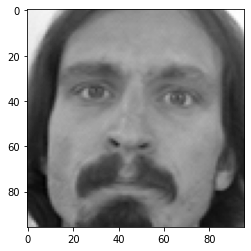

In [14]:
image_list = np.array(image, dtype='float')
x_train = image_list.reshape(-1,96,96,1)
plt.imshow(x_train[0].reshape(96,96),cmap='gray')
plt.show()


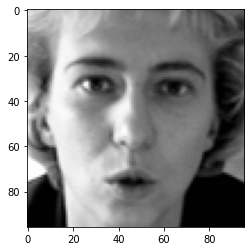

In [15]:
plt.imshow(x_train[1].reshape(96,96), cmap='gray')
plt.show()

In [16]:
training=train.drop('Image',axis=1)

y_train=[]

for i in range(7049):
    y = training.iloc[i,0:31]
    y_train.append(y)

y_train=np.array(y_train,dtype='float')

In [17]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, Activation, ZeroPadding2D, Convolution2D, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers.advanced_activations import LeakyReLU

In [18]:
model= Sequential()

model.add(Conv2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())

model.add(Conv2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0

In [26]:
mc=ModelCheckpoint("best_model.h5", monitor='loss', verbose=1, save_best_only=True, mode='min')
es=EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=3)

In [20]:
test_image=[]

for i in range(1783):
    timg = test['Image'][i].split()
    timg = [0 if x=='' else x for x in timg]

    test_image.append(timg)

In [21]:
test_image_list=np.array(test_image, dtype='float')
print(test_image_list.shape)

(1783, 9216)


In [22]:
x_test= test_image_list.reshape(-1,96,96,1)
x_test.shape

(1783, 96, 96, 1)

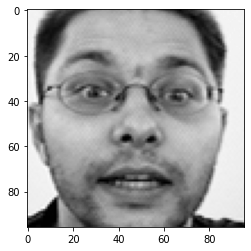

In [23]:
plt.imshow(x_test[0].reshape(96,96), cmap='gray')
plt.show()

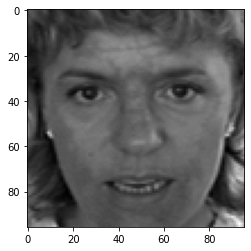

In [24]:
plt.imshow(x_test[1].reshape(96,96),cmap='gray')
plt.show()

In [27]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae'])
history=model.fit(x_train,y_train,epochs=5, batch_size=128, callbacks=[mc,es],validation_split=0.2)

Epoch 1/5
45/45 [==============================] - 410s 9s/step - loss: 180.7014 - mae: 9.0495 - val_loss: 802.2974 - val_mae: 25.8779

Epoch 00001: loss improved from inf to 97.25213, saving model to best_model.h5
Epoch 2/5
45/45 [==============================] - 401s 9s/step - loss: 29.5276 - mae: 4.1697 - val_loss: 188.3937 - val_mae: 12.5210

Epoch 00002: loss improved from 97.25213 to 27.58380, saving model to best_model.h5
Epoch 3/5
45/45 [==============================] - 401s 9s/step - loss: 26.9802 - mae: 3.9876 - val_loss: 102.9340 - val_mae: 8.9272

Epoch 00003: loss improved from 27.58380 to 26.78501, saving model to best_model.h5
Epoch 4/5
45/45 [==============================] - 408s 9s/step - loss: 26.9274 - mae: 3.9675 - val_loss: 14.4386 - val_mae: 2.6593

Epoch 00004: loss improved from 26.78501 to 25.40232, saving model to best_model.h5
Epoch 5/5
45/45 [==============================] - 405s 9s/step - loss: 25.9594 - mae: 3.8904 - val_loss: 15.9216 - val_mae: 3.0484

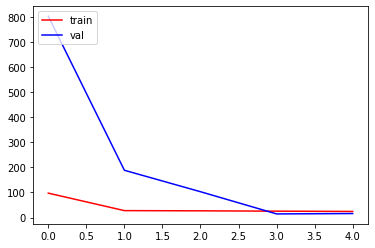

In [28]:
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='blue')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [30]:
pred=model.predict(x_test)

In [32]:
pred.shape

(1783, 30)

In [33]:
pred_df=pd.DataFrame(pred)

In [34]:
pred_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,69.927322,37.919800,30.991964,36.904129,61.368809,38.418560,76.274498,37.937489,37.830021,38.402622,22.693176,37.528126,58.402573,27.382732,83.848991,29.200089,38.965935,29.893408,17.109167,29.068760,50.613815,54.544163,64.607056,77.320969,33.671932,76.737785,49.139988,72.430748,49.685604,84.941071
1,66.007286,34.922688,28.372013,35.486645,59.640644,35.763874,72.814445,36.005772,35.529953,37.110569,22.260242,38.370701,54.971405,30.146034,79.969116,27.804100,36.335274,30.883848,15.760559,30.643837,47.480835,58.376938,62.784718,74.120232,33.884457,74.500908,48.120586,73.479546,47.894485,81.828720
2,66.304420,36.340652,32.357365,38.800896,60.311859,37.254086,73.203255,36.926830,37.732773,39.237453,23.745987,40.223804,56.824249,30.648884,77.927788,28.918449,39.821789,31.803667,17.495142,33.799438,50.555191,57.946049,66.260948,73.823479,35.035580,78.047729,51.230587,72.320473,50.916039,81.432762
3,76.050316,42.674435,35.401695,45.306435,68.508484,44.740414,85.560791,43.128624,43.966217,46.467403,25.585606,46.693989,61.076931,33.375000,91.575447,34.046387,43.298649,36.900463,15.730245,39.889023,55.837811,62.800461,76.401505,86.718323,39.491207,90.385559,56.087070,83.676842,56.918839,92.630432
4,69.752594,35.963364,29.454506,35.909092,63.149307,37.681995,75.179054,36.449841,37.083618,38.558811,24.202944,39.447582,59.312820,28.596516,84.470879,27.240143,37.864185,28.460138,15.846669,30.595245,50.812202,58.351135,65.114243,77.462082,35.614330,76.842796,50.411209,73.376991,49.357750,83.794281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,62.454281,35.276253,30.043282,33.995331,55.438534,35.125351,69.437111,33.659004,35.023300,36.448032,21.665693,37.251793,53.329929,28.490284,74.618767,27.164581,37.648815,30.590469,14.514227,30.289757,47.648384,55.038097,62.080723,68.586105,30.983265,72.131592,46.209133,69.473961,47.433964,72.034950
1779,70.499229,36.551464,32.737053,45.387192,62.245373,39.209454,79.382248,36.326046,39.227135,42.681705,23.537863,44.626450,54.858749,30.934711,84.811043,29.312809,40.676060,37.012936,15.359611,39.748238,53.117779,68.057213,76.489014,75.819534,38.693012,82.969315,55.022621,80.416862,57.270554,79.584320
1780,73.886147,40.885849,35.088631,40.432266,66.188568,39.042133,82.099419,38.284603,41.497612,42.722553,24.516685,43.517368,59.645096,33.039326,89.494621,29.618582,43.572514,37.303806,15.903717,39.499615,53.204010,71.695549,80.358582,78.990669,37.534683,86.426826,57.175888,83.397057,52.111683,83.852386
1781,69.220085,39.086670,32.018784,41.553360,61.591114,37.864635,76.161247,37.113098,38.737480,42.207775,23.161396,43.032993,55.768730,31.111382,84.687904,29.349018,39.547169,34.571648,15.190169,37.883106,48.182461,64.656097,73.629250,74.520630,35.053696,80.520996,53.545506,79.194054,48.955070,78.682709


In [37]:
table

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN
...,...,...,...,...
27119,27120,1783,right_eye_center_y,NaN
27120,27121,1783,nose_tip_x,NaN
27121,27122,1783,nose_tip_y,NaN
27122,27123,1783,mouth_center_bottom_lip_x,NaN


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


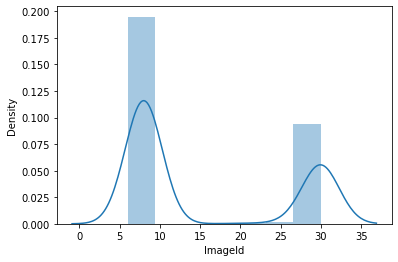

In [46]:
sns.distplot(table['ImageId'].value_counts())

In [55]:
feature_name_list=list(table['FeatureName'])
imageid_list=list(table['ImageId'] - 1) #pred에서 1번째 image는 0번 index로 되어져 있기 때문

In [50]:
len(feature_name_list), len(imageid_list)

(27124, 27124)

In [51]:
pred_list=list(pred)

In [63]:
feature = []

for f in feature_name_list:
    feature.append(feature_name_list.index(f))


In [64]:
preded =[]

for x,y in zip(imageid_list, feature):
    preded.append(pred_list[x][y])

In [66]:
len(preded)

27124

In [67]:
submission.iloc[:,1]=preded

In [68]:
submission

,RowId,Location
0,1,69.927322
1,2,37.919800
2,3,30.991964
3,4,36.904129
4,5,61.368809
...,...,...
27119,27120,39.008579
27120,27121,47.843498
27121,27122,63.750488
27122,27123,47.076702


In [69]:
submission.to_csv("facial_keypoint.csv",index=False)